In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ghaza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

import re
import string

from string import punctuation
from nltk.corpus import stopwords

stop_words = stopwords.words('indonesian')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [4]:
bisnis=pd.read_csv('bisnis.csv')
lifestyle=pd.read_csv('lifestyle.csv')
sport=pd.read_csv('sport.csv')

In [5]:
#make sentimen target
bisnis['Sentimen']=1
lifestyle['Sentimen']=2
sport['Sentimen']=3

In [6]:
#combine data
data=bisnis[['content','Sentimen']].append(lifestyle[['content','Sentimen']]).append(sport[['content','Sentimen']])

In [7]:
data

,content,Sentimen
0,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",1
1,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",1
2,b'TRIBUNNEWS.COM - Masyarakat Indonesia dapat ...,1
3,"b'TRIBUNNEWS.COM, JAKARTA -\xc2\xa0 Pemerintah...",1
4,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",1
...,...,...
35,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3
36,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3
37,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3
38,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3


In [8]:
data = data.reset_index(drop=True)

In [9]:
data

,content,Sentimen
0,"b'TRIBUNNEWS.COM, JAKARTA -- Pemerintah optimi...",1
1,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",1
2,b'TRIBUNNEWS.COM - Masyarakat Indonesia dapat ...,1
3,"b'TRIBUNNEWS.COM, JAKARTA -\xc2\xa0 Pemerintah...",1
4,"b'Laporan Wartawan Tribunnews.com, Yanuar Riez...",1
...,...,...
115,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3
116,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3
117,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3
118,"b'TRIBUNNEWS.COM - Ajang Balapan MotoGP 2020, ...",3


In [10]:
data.to_csv('datagab.csv')

Lower Case

In [11]:
data['content'] = [x.lower() for x in data['content']]
data['content'] 

0      b'tribunnews.com, jakarta -- pemerintah optimi...
1      b'laporan wartawan tribunnews.com, yanuar riez...
2      b'tribunnews.com - masyarakat indonesia dapat ...
3      b'tribunnews.com, jakarta -\xc2\xa0 pemerintah...
4      b'laporan wartawan tribunnews.com, yanuar riez...
                             ...                        
115    b'tribunnews.com - ajang balapan motogp 2020, ...
116    b'tribunnews.com - ajang balapan motogp 2020, ...
117    b'tribunnews.com - ajang balapan motogp 2020, ...
118    b'tribunnews.com - ajang balapan motogp 2020, ...
119    b'tribunnews.com - ajang balapan motogp 2020, ...
Name: content, Length: 120, dtype: object

Removing White Space

In [12]:
data['content']=[x.strip() for x in data['content']]
data['content']

0      b'tribunnews.com, jakarta -- pemerintah optimi...
1      b'laporan wartawan tribunnews.com, yanuar riez...
2      b'tribunnews.com - masyarakat indonesia dapat ...
3      b'tribunnews.com, jakarta -\xc2\xa0 pemerintah...
4      b'laporan wartawan tribunnews.com, yanuar riez...
                             ...                        
115    b'tribunnews.com - ajang balapan motogp 2020, ...
116    b'tribunnews.com - ajang balapan motogp 2020, ...
117    b'tribunnews.com - ajang balapan motogp 2020, ...
118    b'tribunnews.com - ajang balapan motogp 2020, ...
119    b'tribunnews.com - ajang balapan motogp 2020, ...
Name: content, Length: 120, dtype: object

Tokenization

In [13]:
data['content']= [x.split() for x in data['content']]
data['content']

0      [b'tribunnews.com,, jakarta, --, pemerintah, o...
1      [b'laporan, wartawan, tribunnews.com,, yanuar,...
2      [b'tribunnews.com, -, masyarakat, indonesia, d...
3      [b'tribunnews.com,, jakarta, -\xc2\xa0, pemeri...
4      [b'laporan, wartawan, tribunnews.com,, yanuar,...
                             ...                        
115    [b'tribunnews.com, -, ajang, balapan, motogp, ...
116    [b'tribunnews.com, -, ajang, balapan, motogp, ...
117    [b'tribunnews.com, -, ajang, balapan, motogp, ...
118    [b'tribunnews.com, -, ajang, balapan, motogp, ...
119    [b'tribunnews.com, -, ajang, balapan, motogp, ...
Name: content, Length: 120, dtype: object

Removing Non-Alphanumeric Character

In [14]:
remove_table = str.maketrans("", "", punctuation)
nonpunctuation_stc = []
for stc in data['content']:
    words = [x.translate(remove_table) for x in stc]
    words2 = []
    for w in words:
        w = [x for x in w if x.isalnum()]
        w = "".join(w)
        words2.append(w)
    
    nonpunctuation_stc.append(words2) 
    
    
    
data['content']= nonpunctuation_stc
data['content']

0      [btribunnewscom, jakarta, , pemerintah, optimi...
1      [blaporan, wartawan, tribunnewscom, yanuar, ri...
2      [btribunnewscom, , masyarakat, indonesia, dapa...
3      [btribunnewscom, jakarta, xc2xa0, pemerintah, ...
4      [blaporan, wartawan, tribunnewscom, yanuar, ri...
                             ...                        
115    [btribunnewscom, , ajang, balapan, motogp, 202...
116    [btribunnewscom, , ajang, balapan, motogp, 202...
117    [btribunnewscom, , ajang, balapan, motogp, 202...
118    [btribunnewscom, , ajang, balapan, motogp, 202...
119    [btribunnewscom, , ajang, balapan, motogp, 202...
Name: content, Length: 120, dtype: object

Stopwords + Sastrawi

In [15]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

addOnStopwords = ['btribunnewscom']
factory = StopWordRemoverFactory()
stopwordSastrawi = factory.get_stop_words()
stop_words=stop_words+stopwordSastrawi+addOnStopwords

In [16]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [17]:
# remove stopwords using Stopwords Indonesian
stop_words.append("btribunnewcom")
nonstop_words = []
for stc in data['content']:
    words = [x for x in stc if x not in stop_words]
    
    nonstop_words.append(words)
    
data['content']= nonstop_words
data['content'] = [" ".join(x) for x in data['content']]
data['content']

0      jakarta  pemerintah optimistis sektor pertania...
1      blaporan wartawan tribunnewscom yanuar riezqi ...
2       masyarakat indonesia menikmati token listrik ...
3      jakarta xc2xa0 pemerintah dpr ri resmi mengesa...
4      blaporan wartawan tribunnewscom yanuar riezqi ...
                             ...                        
115     ajang balapan motogp 2020 digelar pekan mingg...
116     ajang balapan motogp 2020 digelar pekan mingg...
117     ajang balapan motogp 2020 digelar pekan mingg...
118     ajang balapan motogp 2020 digelar pekan mingg...
119     ajang balapan motogp 2020 digelar pekan mingg...
Name: content, Length: 120, dtype: object

Stemming

In [18]:
data['content']= [stemmer.stem(x) for x in data['content']]
data['content']

0      jakarta perintah optimistis sektor tani sangga...
1      blaporan wartawan tribunnewscom yanuar riezqi ...
2      masyarakat indonesia nikmat token listrik grat...
3      jakarta xc2xa0 perintah dpr ri resmi kesah omn...
4      blaporan wartawan tribunnewscom yanuar riezqi ...
                             ...                        
115    ajang balap motogp 2020 gelar pekan minggu 111...
116    ajang balap motogp 2020 gelar pekan minggu 111...
117    ajang balap motogp 2020 gelar pekan minggu 111...
118    ajang balap motogp 2020 gelar pekan minggu 111...
119    ajang balap motogp 2020 gelar pekan minggu 111...
Name: content, Length: 120, dtype: object

In [19]:
#high frequency word
from collections import Counter
cnt = Counter()
for text in data['content'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('2020', 187),
 ('kerja', 175),
 ('motogp', 170),
 ('baca', 154),
 ('marc', 112),
 ('indonesia', 103),
 ('marquez', 98),
 ('balap', 89),
 ('cipta', 87),
 ('juara', 84)]

In [22]:
data['Sentimen'].value_counts()

1    40
2    40
3    40
Name: Sentimen, dtype: int64

In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data['content'], data['Sentimen'], test_size=0.25, random_state=10)

In [24]:
cv = CountVectorizer()
X_train_vect2 = cv.fit_transform(X_train2)
X_test_vect2 = cv.transform(X_test2)

# SVM Model

In [25]:
#modelling with svm
SVM = svm.SVC()
SVM.fit(X_train_vect2, y_train2)

SVC()

In [26]:
predicted_SVM1 = SVM.predict(X_test_vect2)

## First Evaluation

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

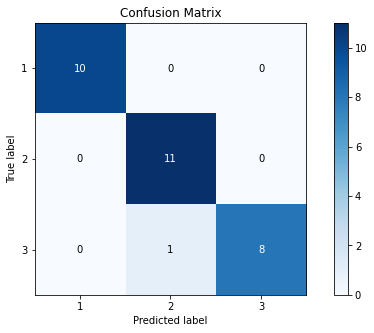

In [27]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test2, 
    predicted_SVM1,
    figsize=(10,5))

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test2, predicted_SVM1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        11
           3       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Hyperparameter Tuning with GridSearchCV and Evaluation

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

# defining parameter range 
param_grid_SVM = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid_SVM = GridSearchCV(SVC(), param_grid_SVM, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_SVM.fit(X_train_vect2, y_train2) 
 
# print best parameter after tuning 
print(grid_SVM.best_params_) 
grid_predictions_SVM = grid_SVM.predict(X_test_vect2) 
   
# print classification report 
print(classification_report(y_test2, grid_predictions_SVM)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

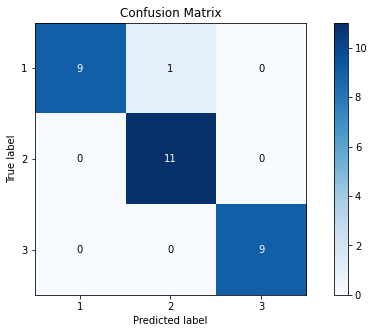

In [30]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test2, 
    grid_predictions_SVM,
    figsize=(10,5))

# ANN

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(50,)],
    'activation': ['sigmoid','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.0005]
}
clf = GridSearchCV(mlp_gs, parameter_space,refit=True, n_jobs=-1, cv=5)
clf.fit(X_train_vect2, y_train2) 
print('Best parameters found:\n', clf.best_params_)

clf_prediction = clf.predict(X_test_vect2) 
   
# print classification report 
print(classification_report(y_test2, clf_prediction)) 

C:\Users\Ghaza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.82222222 0.95555556 0.85555556 0.96666667 0.9        0.93333333
 0.9        0.95555556 0.91111111 0.93333333 0.87777778 0.94444444
 0.88888889 0.93333333 0.93333333 0.94444444 0.91111111 0.96666667
 0.9        0.93333333 0.88888889 0.93333333 0.87777778 0.96666667
 0.73333333 0.95555556 0.8        0.95555556 0.87777778 0.94444444
 0.76666667 0.93333333 0.82222222 0.96666667 0.83333333 0.95555556
 0.71111111 0.94444444 0.84444444 0.96666667 0.88888889 0.94444444
 0.71111111 0.95555556 0.85555556 0.95555556 0.9        0.97777778]
  warnings.warn(


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

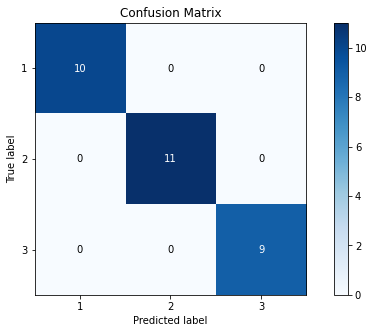

In [34]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test2, 
    clf_prediction,
    figsize=(10,5))

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf_randomforest = GridSearchCV(randomforest, param_grid=param_grid,refit=True, cv= 5)

clf_randomforest.fit(X_train_vect2, y_train2) 
print('Best parameters found:\n', clf_randomforest.best_params_)

clf_prediction_randomforest = clf_randomforest.predict(X_test_vect2) 
   
# print classification report 
print(classification_report(y_test2, clf_prediction_randomforest)) 

Best parameters found:
 {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.85      1.00      0.92        11
           3       1.00      0.89      0.94         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

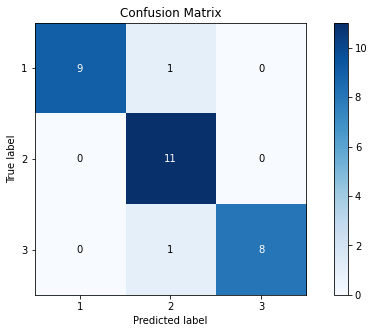

In [35]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test2, 
    clf_prediction_randomforest,
    figsize=(10,5))